In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports
require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [4]:
%%R

library(jpeg)
library(png)
library(grid)
library(hrbrthemes)


R[write to console]: NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

R[write to console]:       Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

R[write to console]:       if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow



In [5]:
df_five = pd.read_csv('shootings_five_years.csv')
df_five.tail(20)

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year
2681,1037515,2018-01-28,Indiana,Indianapolis,1313 N Sherman Dr,2,3,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2682,1038429,2018-01-28,Pennsylvania,Reading,123 S 3rd St,4,0,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2683,1037438,2018-01-27,Kentucky,Bowling Green,645 Pearl Street,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2684,1037541,2018-01-27,California,Los Angeles,243 East 119th St,0,5,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2685,1035803,2018-01-25,District of Columbia,Washington,1600 block of Kenilworth Ave NE,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2686,1033262,2018-01-23,Kentucky,Benton,416 High School Rd,2,14,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2687,1034205,2018-01-23,Pennsylvania,Philadelphia,N 24th St and Ridge Ave,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2688,1032393,2018-01-21,Florida,Orlando,3101 Willow Bend Blvd,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2689,1031851,2018-01-21,Illinois,Chicago,3200 W Division St,0,4,https://www.gunviolencearchive.org/incident/10...,2018,01-2018
2690,1029095,2018-01-17,District of Columbia,Washington,2000 block of 16th St SE,1,3,https://www.gunviolencearchive.org/incident/10...,2018,01-2018


In [84]:
df_five.dtypes

incident_id        int64
incident_date     object
state             object
city_or_county    object
address           object
killed             int64
injured            int64
incident_url      object
year               int64
month-year        object
dtype: object

In [6]:
df_five['month-year'] = pd.to_datetime(df_five['month-year'], format='%m-%Y').dt.strftime('%m-%Y')
df_five.head()


,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year
0,2491656,2022-12-31,Arizona,Phoenix,4201 N 19th Ave,0,9,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
1,2492253,2022-12-31,Alabama,Mobile,200 block of Dauphin St,1,8,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
2,2491054,2022-12-30,Tennessee,Memphis,E Brooks Rd,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
3,2490925,2022-12-30,Texas,Humble,4800 block of Park Square Ln,2,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022
4,2489614,2022-12-28,New York,Bronx,851 E Tremont Ave,1,3,https://www.gunviolencearchive.org/incident/24...,2022,12-2022


In [12]:
df_five['new_col'] = pd.to_datetime(df_five['month-year'], format='%m-%Y')
df_five['month-year'] = df_five['new_col'].dt.to_period('M')
df_five.drop(['new_col'], axis=1, inplace=True)
df_five.dtypes


incident_id           int64
incident_date        object
state                object
city_or_county       object
address              object
killed                int64
injured               int64
incident_url         object
year                  int64
month-year        period[M]
dtype: object

In [13]:
df_five.head()

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year
0,2491656,2022-12-31,Arizona,Phoenix,4201 N 19th Ave,0,9,https://www.gunviolencearchive.org/incident/24...,2022,2022-12
1,2492253,2022-12-31,Alabama,Mobile,200 block of Dauphin St,1,8,https://www.gunviolencearchive.org/incident/24...,2022,2022-12
2,2491054,2022-12-30,Tennessee,Memphis,E Brooks Rd,1,3,https://www.gunviolencearchive.org/incident/24...,2022,2022-12
3,2490925,2022-12-30,Texas,Humble,4800 block of Park Square Ln,2,3,https://www.gunviolencearchive.org/incident/24...,2022,2022-12
4,2489614,2022-12-28,New York,Bronx,851 E Tremont Ave,1,3,https://www.gunviolencearchive.org/incident/24...,2022,2022-12


In [9]:
killed_by_year = df_five.groupby('year')['killed'].sum()
killed_by_year

year
2018    372
2019    465
2020    513
2021    706
2022    676
Name: killed, dtype: int64

In [10]:
# put the data into a dataframe

df_killed = pd.DataFrame(killed_by_year)
df_killed = df_killed.reset_index()
df_killed

,year,killed
0,2018,372
1,2019,465
2,2020,513
3,2021,706
4,2022,676


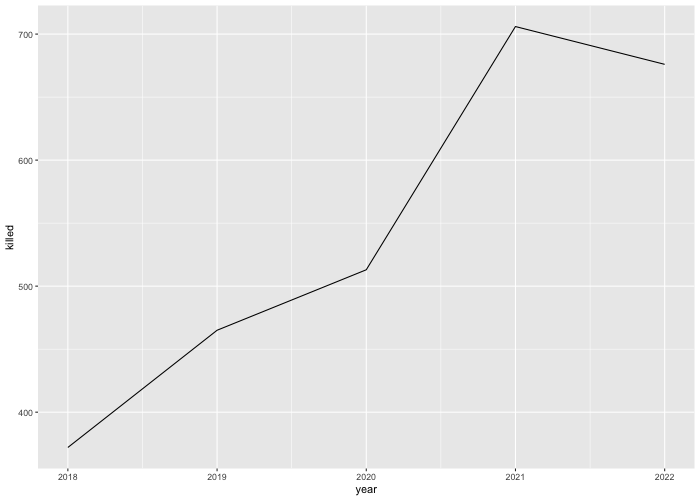

In [11]:
%%R -i df_killed  -h 500 -w 700

ggplot(df_killed) +
    aes(x = year, y = killed) +
    geom_line() 
 


In [14]:
df_decade = pd.read_csv('shootings_eight_years.csv')
df_decade.tail(20)

,incident_id,incident_date,state,city_or_county,address,killed,injured,incident_url,year,month-year
4741,104218,2014-02-05,Illinois,Chicago,6740 N Clark St,1,3,https://www.gunviolencearchive.org/incident/10...,2014,02-2014
4742,103698,2014-02-03,Indiana,Franklin,2100 block of Bridlewood Dr,3,2,https://www.gunviolencearchive.org/incident/10...,2014,02-2014
4743,140117,2014-01-30,Texas,Cypress,14015 Fosters Creek Dr,4,0,https://www.gunviolencearchive.org/incident/14...,2014,01-2014
4744,101301,2014-01-27,North Carolina,Rocky Mount,821 Word Plaza,0,4,https://www.gunviolencearchive.org/incident/10...,2014,01-2014
4745,113665,2014-01-27,Washington,Seattle,2nd Avenue South and South Main Street,1,4,https://www.gunviolencearchive.org/incident/11...,2014,01-2014
4746,100434,2014-01-25,Illinois,Chicago,S Union Ave and W 51st St,1,4,https://www.gunviolencearchive.org/incident/10...,2014,01-2014
4747,100568,2014-01-25,Florida,Belle Glade,600 block of Covenant Drive,0,4,https://www.gunviolencearchive.org/incident/10...,2014,01-2014
4748,98836,2014-01-21,New Jersey,Newark,Springfield Avenue,2,3,https://www.gunviolencearchive.org/incident/98836,2014,01-2014
4749,104902,2014-01-20,Virginia,Manassas,8509 Rixlew Ln,0,4,https://www.gunviolencearchive.org/incident/10...,2014,01-2014
4750,97407,2014-01-16,Oklahoma,Ardmore,H St NE and Martin Luther King Blvd,2,4,https://www.gunviolencearchive.org/incident/97407,2014,01-2014


In [15]:
killed = df_decade.groupby('year')['killed'].sum()
killed

year
2014    275
2015    738
2016    906
2017    443
2018    372
2019    465
2020    513
2021    706
2022    676
Name: killed, dtype: int64

In [16]:
# put killed in a dataframe

df_killed = pd.DataFrame(killed)
df_killed = df_killed.reset_index()
df_killed

,year,killed
0,2014,275
1,2015,738
2,2016,906
3,2017,443
4,2018,372
5,2019,465
6,2020,513
7,2021,706
8,2022,676


In [17]:
injured = df_decade.groupby('year')['injured'].sum()
injured

year
2014    1086
2015    2674
2016    3078
2017    1809
2018    1330
2019    1712
2020    2540
2021    2827
2022    2702
Name: injured, dtype: int64

In [18]:
df_injured = pd.DataFrame(injured)
df_injured = df_injured.reset_index()
df_injured

,year,injured
0,2014,1086
1,2015,2674
2,2016,3078
3,2017,1809
4,2018,1330
5,2019,1712
6,2020,2540
7,2021,2827
8,2022,2702


In [19]:

incidents = df_decade.groupby('year')['incident_id'].count()
incidents

year
2014    273
2015    672
2016    766
2017    349
2018    336
2019    417
2020    610
2021    690
2022    648
Name: incident_id, dtype: int64

In [20]:
df_incidents = pd.DataFrame(incidents)
df_incidents = df_incidents.reset_index()
df_incidents.rename(columns={'incident_id': 'count'}, inplace=True)
df_incidents

,year,count
0,2014,273
1,2015,672
2,2016,766
3,2017,349
4,2018,336
5,2019,417
6,2020,610
7,2021,690
8,2022,648


In [23]:
# combine dataframe

df_victims = pd.merge(df_killed, df_injured, on='year')
df_victims = pd.merge(df_victims, df_incidents, on='year')
df_victims

,year,killed,injured,count
0,2014,275,1086,273
1,2015,738,2674,672
2,2016,906,3078,766
3,2017,443,1809,349
4,2018,372,1330,336
5,2019,465,1712,417
6,2020,513,2540,610
7,2021,706,2827,690
8,2022,676,2702,648


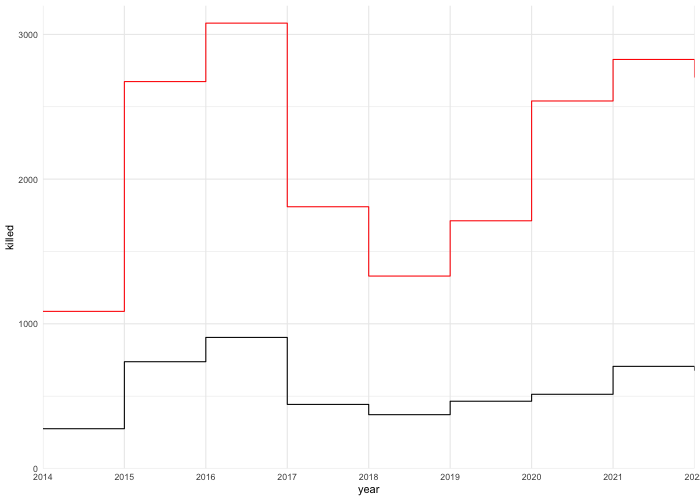

In [44]:
%%R -i df_victims -h 500 -w 700

ggplot(df_victims) +
    aes(x = year, y = killed) +
    geom_step() +
    geom_step(aes(y = injured), color = 'red') +
    scale_x_continuous(breaks = seq(2014, 2022, by = 1)) +
    scale_y_continuous(breaks = seq(0, 3000, by = 1000), limits = c(0, 3200)) +
    coord_cartesian(xlim = c(2014,2022), expand = FALSE) +
    theme_minimal() +
    theme(
    panel.grid.minor.x = element_blank()
  )
 